In [1]:
# importing the required dependencies

import pandas as pd # python's library for data manipulation and preprocessing
import numpy as np  # python's library for number crunching

import matplotlib            # python's library for visualisation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns        # also python's library for visualisations
color = sns.color_palette()
sns.set_style('darkgrid')


import sklearn                #python's machine learning library
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('databrasilescola_skills.csv')   # reading the data into a pandas dataframe
df.head()                         # calling the first five rows of the dataset

,NumberTokens,FirstPerson,Enclise,Demonstrative,GrammarErrors,SentenceLong,DiscourseMarkers,SpellingCheck,FleshScore,StyleErrors,...,Adverbs,Conjunctions,ConclusionMarkers,finalgrade,filename,understandingGrade,selectinginfoGrade,showknowGrade,solutionGrade,formalGrade
0,269.0,2.0,1.0,0.0,0.0,4.0,7.0,2.0,9.114008,8.0,...,0.055762,0.048327,6.0,500.0,/Users/evelin.amorim/Documents/UFMG/aes/databr...,100.0,100.0,100.0,100.0,100.0
1,313.0,1.0,2.0,1.0,0.0,8.0,10.0,4.0,55.996964,7.0,...,0.073482,0.038339,3.0,550.0,/Users/evelin.amorim/Documents/UFMG/aes/databr...,50.0,100.0,150.0,100.0,150.0
2,377.0,1.0,6.0,3.0,0.0,12.0,9.0,6.0,49.740826,15.0,...,0.045093,0.037135,5.0,800.0,/Users/evelin.amorim/Documents/UFMG/aes/databr...,150.0,200.0,150.0,150.0,150.0
3,259.0,1.0,0.0,3.0,0.0,9.0,11.0,8.0,70.265400,12.0,...,0.081081,0.038610,3.0,450.0,/Users/evelin.amorim/Documents/UFMG/aes/databr...,100.0,100.0,100.0,100.0,50.0
4,382.0,0.0,0.0,1.0,0.0,10.0,10.0,10.0,51.473900,5.0,...,0.057592,0.052356,4.0,850.0,/Users/evelin.amorim/Documents/UFMG/aes/databr...,200.0,150.0,200.0,150.0,150.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 40 columns):
NumberTokens                   8553 non-null float64
FirstPerson                    8553 non-null float64
Enclise                        8553 non-null float64
Demonstrative                  8553 non-null float64
GrammarErrors                  8553 non-null float64
SentenceLong                   8553 non-null float64
DiscourseMarkers               8553 non-null float64
SpellingCheck                  8553 non-null float64
FleshScore                     8553 non-null float64
StyleErrors                    8553 non-null float64
SimilarityPrompt               8551 non-null float64
NumberDiffWords                8553 non-null float64
FirstPersonNorm                8553 non-null float64
EncliseNorm                    8553 non-null float64
DemonstrativeNorm              8553 non-null float64
GrammarErrorsNorm              8553 non-null float64
DiscourseMarkersNorm           8553 non-null 

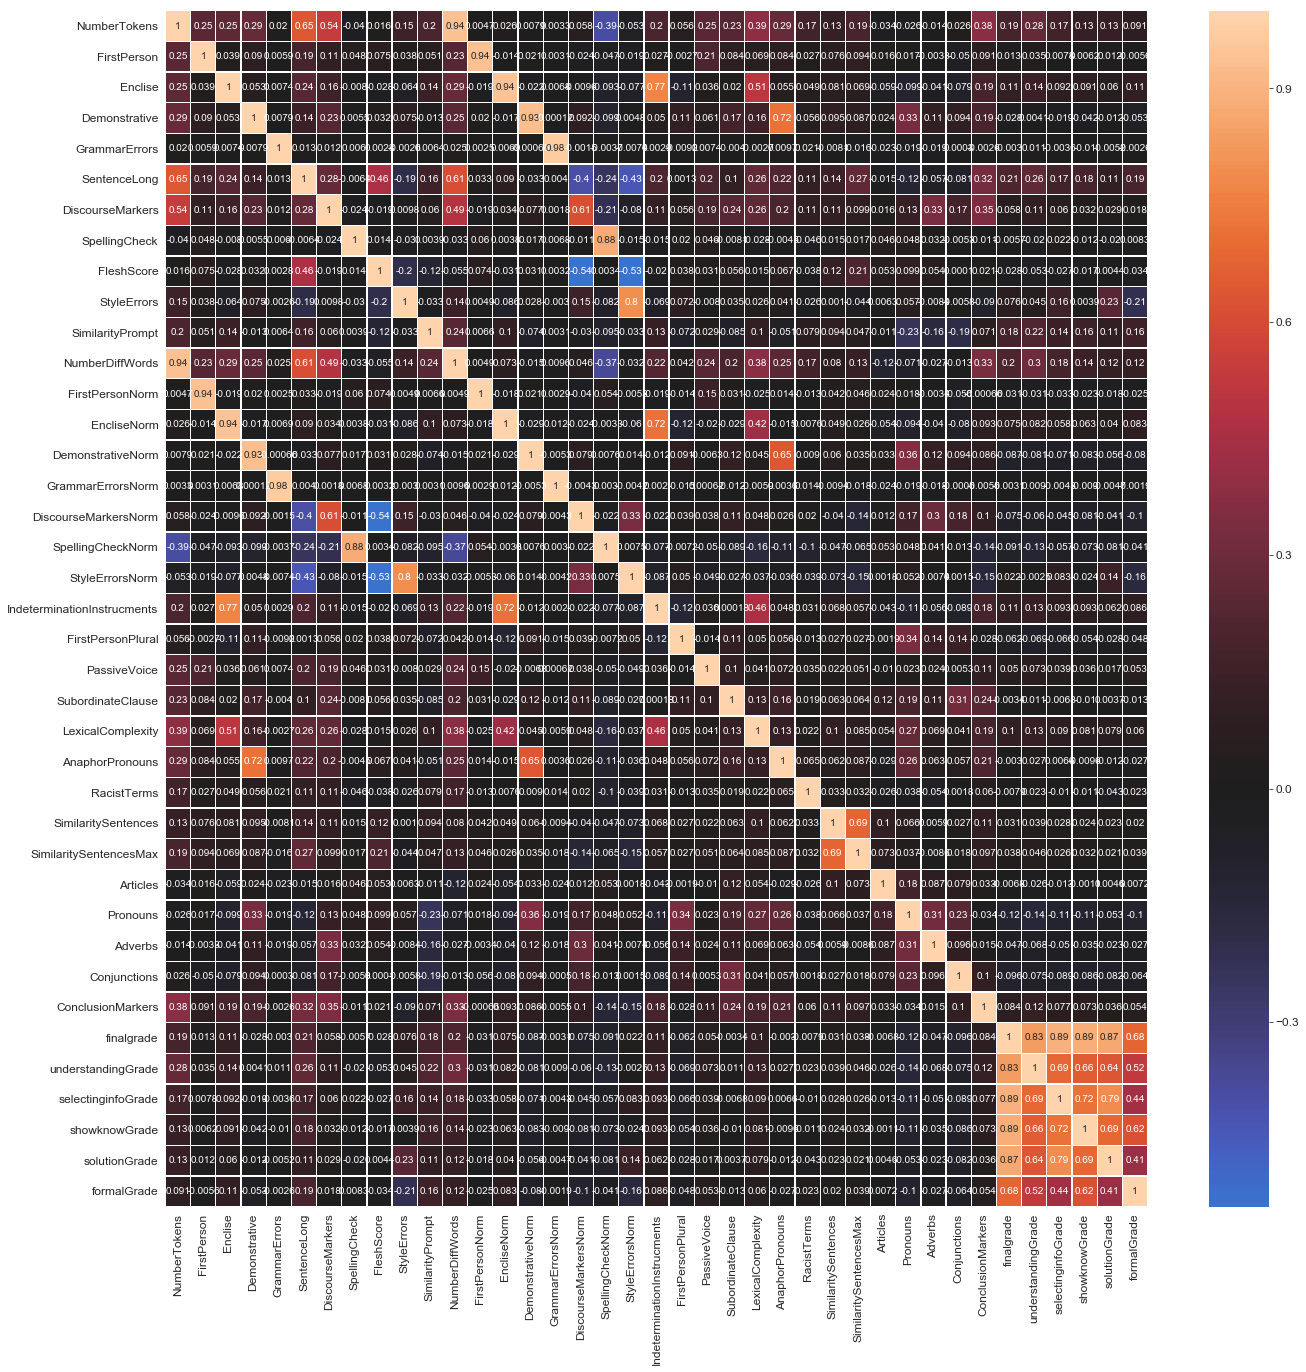

In [4]:
correlation_matrix = df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(22,22))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=0.3)

In [6]:
corr = df.corr()      # showing correlations by target variable
corr['finalgrade'].sort_values(ascending=False)

finalgrade                     1.000000
selectinginfoGrade             0.888703
showknowGrade                  0.885007
solutionGrade                  0.870260
understandingGrade             0.832723
formalGrade                    0.683211
SentenceLong                   0.211307
NumberDiffWords                0.204627
NumberTokens                   0.187072
SimilarityPrompt               0.182333
Enclise                        0.114803
IndeterminationInstrucments    0.108502
LexicalComplexity              0.104736
ConclusionMarkers              0.084207
StyleErrors                    0.076166
EncliseNorm                    0.075215
DiscourseMarkers               0.057965
PassiveVoice                   0.049785
SimilaritySentencesMax         0.037922
SimilaritySentences            0.031439
StyleErrorsNorm                0.022139
FirstPerson                    0.013422
AnaphorPronouns               -0.002963
GrammarErrors                 -0.003039
GrammarErrorsNorm             -0.003056


In [7]:
corr = df.corr()      # showing correlations by target variable
corr['showknowGrade'].sort_values(ascending=False)

showknowGrade                  1.000000
finalgrade                     0.885007
selectinginfoGrade             0.717992
solutionGrade                  0.693706
understandingGrade             0.657787
formalGrade                    0.619893
SentenceLong                   0.180679
SimilarityPrompt               0.155650
NumberDiffWords                0.144128
NumberTokens                   0.125645
IndeterminationInstrucments    0.092837
Enclise                        0.091308
LexicalComplexity              0.080682
ConclusionMarkers              0.072738
EncliseNorm                    0.063090
PassiveVoice                   0.036377
DiscourseMarkers               0.032032
SimilaritySentencesMax         0.031899
SimilaritySentences            0.023530
FirstPerson                    0.006219
StyleErrors                    0.003867
Articles                      -0.001116
GrammarErrorsNorm             -0.009000
AnaphorPronouns               -0.009599
GrammarErrors                 -0.010348


In [8]:
corr = df.corr()      # showing correlations by target variable
corr['selectinginfoGrade'].sort_values(ascending=False)

selectinginfoGrade             1.000000
finalgrade                     0.888703
solutionGrade                  0.794015
showknowGrade                  0.717992
understandingGrade             0.687843
formalGrade                    0.437617
NumberDiffWords                0.182344
NumberTokens                   0.168847
SentenceLong                   0.165917
StyleErrors                    0.158643
SimilarityPrompt               0.143605
IndeterminationInstrucments    0.092663
Enclise                        0.092393
LexicalComplexity              0.090212
StyleErrorsNorm                0.083045
ConclusionMarkers              0.076595
DiscourseMarkers               0.059904
EncliseNorm                    0.057975
PassiveVoice                   0.039444
SimilaritySentences            0.027718
SimilaritySentencesMax         0.026312
SpellingCheck                  0.022230
FirstPerson                    0.007820
AnaphorPronouns                0.006592
GrammarErrors                 -0.003585


In [9]:
corr = df.corr()      # showing correlations by target variable
corr['understandingGrade'].sort_values(ascending=False)

understandingGrade             1.000000
finalgrade                     0.832723
selectinginfoGrade             0.687843
showknowGrade                  0.657787
solutionGrade                  0.635888
formalGrade                    0.522386
NumberDiffWords                0.300173
NumberTokens                   0.277917
SentenceLong                   0.258778
SimilarityPrompt               0.215088
Enclise                        0.144791
LexicalComplexity              0.130342
IndeterminationInstrucments    0.129697
ConclusionMarkers              0.120139
DiscourseMarkers               0.106095
EncliseNorm                    0.082492
PassiveVoice                   0.072631
SimilaritySentencesMax         0.046463
StyleErrors                    0.045435
SimilaritySentences            0.039022
FirstPerson                    0.035069
AnaphorPronouns                0.027379
RacistTerms                    0.023432
SubordinateClause              0.011430
GrammarErrors                  0.010903


In [10]:
corr = df.corr()      # showing correlations by target variable
corr['solutionGrade'].sort_values(ascending=False)

solutionGrade                  1.000000
finalgrade                     0.870260
selectinginfoGrade             0.794015
showknowGrade                  0.693706
understandingGrade             0.635888
formalGrade                    0.411889
StyleErrors                    0.233632
StyleErrorsNorm                0.135484
NumberTokens                   0.125576
NumberDiffWords                0.122096
SentenceLong                   0.111418
SimilarityPrompt               0.106731
LexicalComplexity              0.078546
IndeterminationInstrucments    0.062017
Enclise                        0.060073
EncliseNorm                    0.039553
ConclusionMarkers              0.036326
DiscourseMarkers               0.029358
SimilaritySentences            0.022521
SimilaritySentencesMax         0.020884
PassiveVoice                   0.017483
FirstPerson                    0.011930
Articles                       0.004598
FleshScore                     0.004410
SubordinateClause              0.003679


In [11]:
corr = df.corr()      # showing correlations by target variable
corr['formalGrade'].sort_values(ascending=False)

formalGrade                    1.000000
finalgrade                     0.683211
showknowGrade                  0.619893
understandingGrade             0.522386
selectinginfoGrade             0.437617
solutionGrade                  0.411889
SentenceLong                   0.193889
SimilarityPrompt               0.160955
NumberDiffWords                0.120563
Enclise                        0.107021
NumberTokens                   0.090786
IndeterminationInstrucments    0.085852
EncliseNorm                    0.083249
LexicalComplexity              0.060171
ConclusionMarkers              0.054313
PassiveVoice                   0.052723
SimilaritySentencesMax         0.038900
RacistTerms                    0.022872
SimilaritySentences            0.019744
DiscourseMarkers               0.017812
SpellingCheck                  0.008335
Articles                       0.007200
GrammarErrorsNorm             -0.001928
GrammarErrors                 -0.002617
FirstPerson                   -0.005564


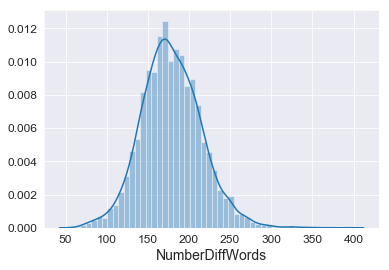

In [12]:
sns.distplot(df.NumberDiffWords) # showing the distribution of the NumberDiffWords variable in the dataset
plt.show()                                  # check the distplot params though. see how you can make it prettier

In [13]:
df["NumberDiffWords"] = np.ceil(df["NumberDiffWords"])

# showing the frequency of each category
df.NumberDiffWords.value_counts().sort_index()

61.0     1
62.0     1
66.0     2
69.0     2
70.0     1
72.0     1
73.0     3
74.0     3
75.0     5
76.0     2
77.0     3
78.0     1
79.0     3
80.0     1
81.0     3
82.0     6
83.0     5
84.0     3
85.0     7
86.0     2
87.0     1
88.0     6
89.0     4
90.0     4
91.0     7
92.0     8
93.0     4
94.0     6
95.0     5
96.0     3
        ..
288.0    1
289.0    2
290.0    1
291.0    2
292.0    1
293.0    1
295.0    3
296.0    1
297.0    1
298.0    1
299.0    3
300.0    2
301.0    1
302.0    1
308.0    2
311.0    1
315.0    1
316.0    1
321.0    1
324.0    1
325.0    1
326.0    1
327.0    1
328.0    1
329.0    1
339.0    1
341.0    1
342.0    1
360.0    1
394.0    1
Name: NumberDiffWords, Length: 249, dtype: int64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["NumberDiffWords"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set.head()

,NumberTokens,FirstPerson,Enclise,Demonstrative,GrammarErrors,SentenceLong,DiscourseMarkers,SpellingCheck,FleshScore,StyleErrors,...,Adverbs,Conjunctions,ConclusionMarkers,finalGrade,filename,understandingGrade,selectinginfoGrade,showknowGrade,solutionGrade,formalGrade
893,435.0,0.0,9.0,4.0,0.0,11.0,10.0,154.0,58.975860,6.0,...,0.082759,0.043678,11.0,600.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,100.0,100.0,200.0,100.0,100.0
1240,208.0,1.0,0.0,5.0,0.0,8.0,3.0,848.0,54.663070,7.0,...,0.076923,0.038462,3.0,550.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,150.0,100.0,50.0,100.0,150.0
2187,414.0,3.0,3.0,0.0,0.0,14.0,8.0,1068.0,53.878260,2.0,...,0.060386,0.045894,3.0,800.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,150.0,150.0,150.0,150.0,200.0
769,303.0,3.0,3.0,1.0,0.0,10.0,9.0,1540.0,73.321686,11.0,...,0.066007,0.066007,1.0,100.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,0.0,0.0,0.0,0.0,100.0
171,341.0,1.0,2.0,0.0,0.0,9.0,9.0,344.0,60.935135,1.0,...,0.093842,0.043988,6.0,150.0,/Users/evelin.amorim/Documents/UFMG/aes/datav2...,50.0,0.0,50.0,0.0,50.0


In [16]:
print(strat_train_set.shape, strat_test_set.shape)


(1946, 40) (487, 40)


In [18]:
strat_train_set.to_csv('datav2_train.csv', index=False)

In [19]:
strat_test_set.to_csv('datav2_test.csv', index=False)